# 01. PyTorch Workflow

Creating an end to end PyTorch workflow

https://www.learnpytorch.io/01_pytorch_workflow/?

What will be covered:
1. Data (Preparing & Loading)
2. Building a Model
3. Fitting the Model
4. Making predictions & evaluating a model (inference)
5. Saving & loading a model
6. Putting it all together

In [279]:
import torch
from torch import nn            # Contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
import numpy as np

# Check PyTorch version
torch.__version__

'2.3.0+cpu'

## 1. Data (Preparing & Loading)

Data can be almost anything in ML

* Excel spreadsheet
* Images
* Videos
* Text
* DNA

Machine learning is a game of 2 parts:
1. Get data into a numerical representation
2. Build a model to learn parameters in that numerical representation

To showcase this, let's create some known data using the linear regression formula
We'll use a linear regression formula to make a straight line with known parameters.

In [280]:
# Creating known parameters
weight = 0.7
bias = 0.3          # Doesn't necessarily need to add up to 1, can be anything

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)

y = weight * X + bias               # Linear regression formula

In [281]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [282]:
len(X), len(y)

(50, 50)

### Splitting data into training & test sets (One of the most important concepts in machine learning)

**Generalization:** The ability of a machine learning model to perform well on data it hasn't seen before.
Our aim is to make a model that generalizes, so that it is useful in the real world, when exposed to new data.

For this, we need to split our data into training & test set.

In [283]:
# Creating a train/test split
train_split = int(0.8 * len(X))             # 80% Training data, 20% Testing data
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

It is always important to visualize our data!

In [284]:
def plot_predictions(train_data = X_train, train_labels = y_train,
                     test_data = X_test, test_labels = y_test, predictions=None):
    # Plots training data, testing data and compares predictions
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")    # c="b" for blue, s for size of the marker
    
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")
    
    # Are there predictions?
    if predictions is not None:
        # Plotting predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    # Showing the legend
    plt.legend(prop={"size": 14})

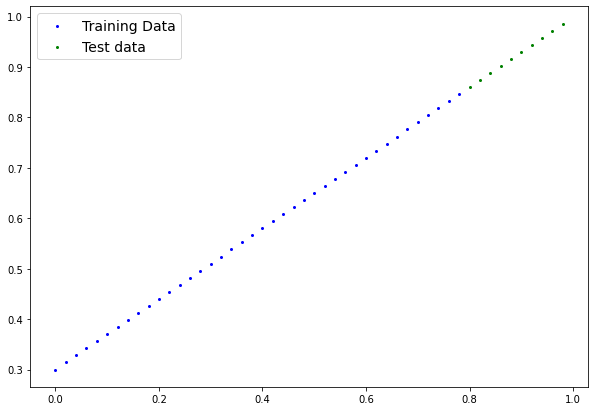

In [285]:
plot_predictions() 

Blue line shows the training data, green line shows the ideal output

## 2. Build Model

Our first PyTorch model!

What our model does:
* Start with random values (weights and biases)
* Look at training data and adjust the random values to better represent the ideal values (weights & biases).

How does it do so?
By 2 main algorithms
1. Gradient descent
2. Backpropagation

In [286]:
# Create linear regression model class
class LinearRegressionModel(nn.Module):         # Almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        
        # Initializing model parameters
        self.weights = nn.Parameter(torch.randn(1,              # randn generates random values with mean 0 & SD 1, normal distribution 
                                                requires_grad=True,     # set by default, used for gradient descent
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float))
        
    # Forward method to define the computation in forward pass
    def forward(self, x: torch.Tensor) -> torch.Tensor:     # -> torch.Tensor Implies that returns a tensor  
        return self.weights * x + self.bias         # Linear regression formula

### PyTorch model building essentials:

* `torch.nn`: Contains all the building blocks for computational graphs (neural networks). A neural network can be considered a computational graph.
* `torch.nn.Parameter`: what parameters should our model try and learn, often a PyTorch layer from `torch.nn` will set these for us
* `torch.nn.Module`: the base class for all neural network modules, if you subclass it, you should override the `forward()` method.
* `torch.optim`: this is where the optimizers in PyTorch live, they will help with gradient descent.
* `def forward()`: All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation.

Learn more: https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the content of our PyTorch model

We can check out our model parameters or what's inside our model using `.parameters()`.

In [287]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of our module (a subclass of nn.Module)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [288]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`
When we pass data to our model, it's going to run it through the `forward()` method.

In `torch.inference_mode()`, PyTorch optimizes the execution for inferencing instead of training, e.g. by stopping to track gradients.

In [289]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [290]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

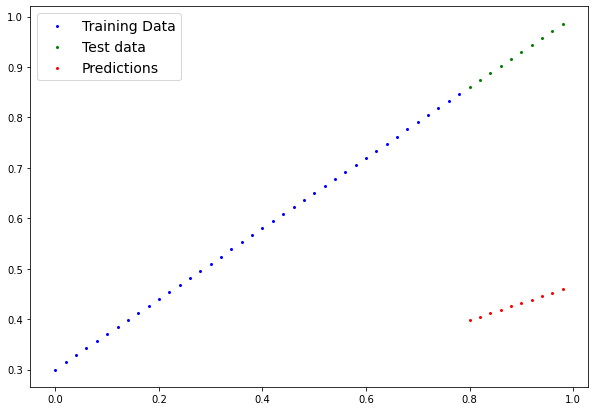

In [291]:
plot_predictions(predictions=y_preds)

Ideally, the red line should completely or closely overlap the green line, as we want our predictions to be close to actual value.

Our model is predicting the `y_test` values quite badly as the weights and biases are random as of now.

### 3. Train Model

The whole idea of training is for a model to move from some unknown parameters to some known parameters.

Or in other words, from a poor representation to a better representation of the data.

One way to measure how poor or wrong our model's predictions are is to use a loss function (also called criterion/cost function).

Things we need to train:

* **Loss function**: A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer**: Takes into account the loss of a model and adjusts the model parameters (e.g. weights and biases in our case) to improve the loss function.
    * Inside the optimizer you'll often have to set 2 parameters:
        * `params`: The model parameters you would like to optimize, e.g. `params=model_0.parameters()`
        * `lr` (learning rate): It is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes).

And specifically in PyTorch,, we need:
* A training loop
* A testing loop

In [292]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [293]:
# Set up a loss function
loss_fn = nn.L1Loss()       # Mean absolute error, can also be MAE_Loss = torch.mean(torch.abs(y_pred = y_test))

# Set up an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)        # lr = learning rate specifies the step by which to nudge the values

Stochastic gradient descent (SGD) randomly nudges the weights and biases of the model, and continues nudging in the same direction if loss improves.

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (involves data moving through our model's `forward()` function(s)) to make predictions on data, also called forward propagation.
2. Calculate the loss (compare forward predictions with ground truth labels)
3. Optimizer zero grad
4. Loss backward - moves backwards through the network to calculate the gradients of each of the parameters w.r.t. the loss (**backpropagation**).
5. Optimizer step - Use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**).

In [294]:
# An epoch is 1 loop through the data... (hyperparameter as we set it ourselves)
epochs = 200

# Setup empty lists to keep track of model progress
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode - sets all parameters that requires gradients to require gradients
    model_0.train()
    
    # 1. Forward pass on train data using the forward() method
    y_pred = model_0(X_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    
    # 3. Zero the gradients of the optimizer (they accumulate by default)
    optimizer.zero_grad()
    
    # 4. Perform backpropagation on the loss w.r.t. to the parameters of the model
    loss.backward()
    
    # 5. Progress/step the optimizer (gradient descent) to update the model parameters w.r.t. the gradients calculated by loss.backward()
    optimizer.step()        
    
    ### Testing
    model_0.eval()      # Turns off different settings not necessary while testing
    with torch.inference_mode():        # Turns off gradient tracking and a couple more things behind the scenes
        # 1. Do the forward pass
        test_pred = model_0(X_test)
        
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
        
    # Printing info for every 10th epoch
    if epoch%10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        
print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test Loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test Loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test Loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test Loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test Loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test Loss: 0.03233227878808975
Ep

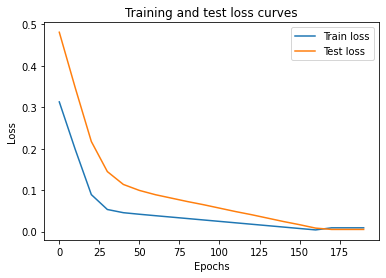

In [295]:
# Plot the loss curve
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='Train loss')
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label='Test loss')
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [296]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

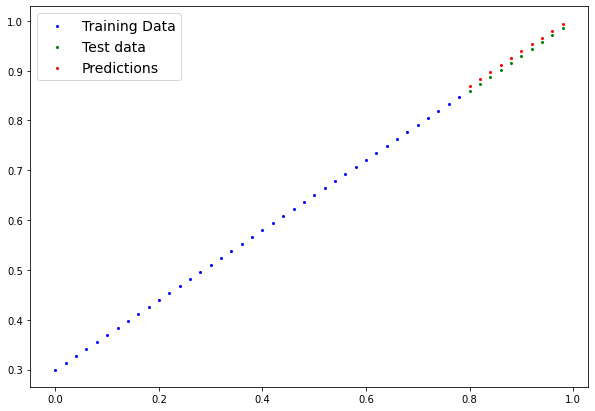

In [297]:
plot_predictions(predictions=y_preds_new)

## Saving a model on PyTorch

There are 3 main methods for saving and loading models in PyTorch:
1. `torch.save()`: allows you to save a PyTorch object in Python's pickle object
2. `torch.load()`: allows you to load a saved PyTorch object
3. `torch.nn.Module().load_state_dict()`: This allows you to load a model's saved state dictionary

In [298]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [299]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create a models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Saving the model's state dict (recommended as against saving the entire model)
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` instead of the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [300]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [301]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [302]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
    
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [303]:
# Make some model predictions
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

In [304]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together
Let's go back through all the steps above and see it all in one place.

In [305]:
# Importing PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.3.0+cpu'

Create device agnostic code:

This means if we've got access to a GPU, our code will use it. If GPU is not available, the code will default to CPU.

In [306]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


## 6.1 Data

In [307]:
# Create some data using the linear regression formula y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y features (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)         # Without unsqueeze, errors will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [308]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

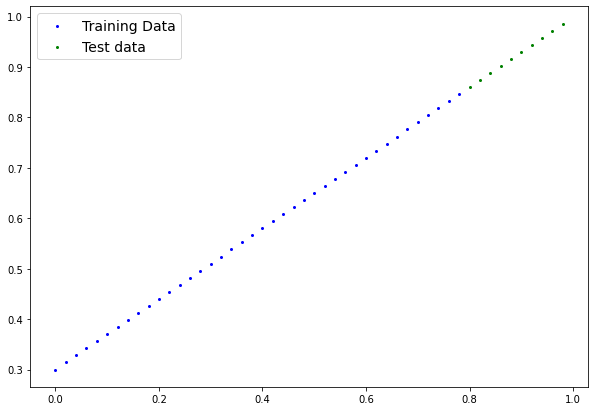

In [309]:
# Plot the data
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear model

In [310]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters, also called linear transform/fully connected layer
        self.linear_layer = nn.Linear(in_features=1, out_features=1)    # Input of size 1 and output of size 1
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [311]:
# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

PyTorch has created weight and bias parameters itself for us as we used `nn.Linear`.

In [312]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [313]:
# Set the model to use the target device (GPU if available)
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [314]:
# Set up a loss function
loss_fn = nn.L1Loss()       # Same as Mean Absolute Error

# Set up our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [315]:
# Writing a training loop
torch.manual_seed(42)

# Put data on the target device (device agnostic code for the data)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

epochs = 200

for epoch in range(epochs):
    model_1.train()
    
    # 1. Forward pass
    y_pred = model_1(X_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    
    # 3. Optimizer zero grad (setting the gradient value back to 0 for each iteration)
    optimizer.zero_grad()
    
    # 4. Perform backpropagation
    loss.backward()
    
    # 5. Optimizer step
    optimizer.step()
    
    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)
    
    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test Loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test Loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test Loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test Loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test Loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test Loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.01380180753767

In [316]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

The weights and biases are now very close the expected values of weight = 0.7 and bias = 0.3

In practice, we don't always know what our ideal values are.

### 6.4 Making and Evaluating Predictions

In [317]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

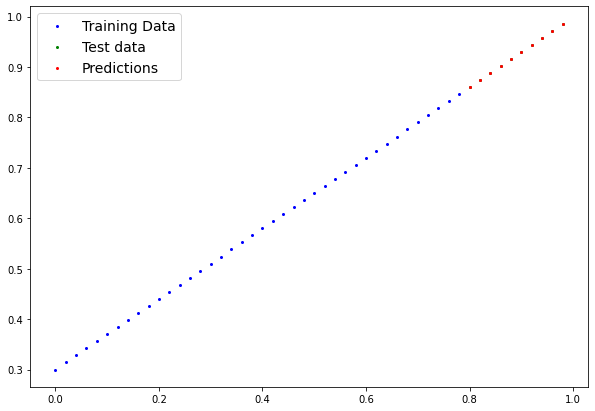

In [318]:
# Checking out our model predictions visually
plot_predictions(predictions=y_preds)

### 6.5 Saving and Loading a Trained Model

In [319]:
from pathlib import Path

# 1. Create model's directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)       # parents=True creates any parent folders that are missing if needed

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to models\01_pytorch_workflow_model_1.pth


In [320]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [321]:
# Load a PyTorch model

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the target model to the device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [322]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [323]:
loaded_model_1.state_dict()         # We get the same values as before

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [325]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)